# **This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation using the past 60 day stock price**

Feel free to use for learning purpose.

In [85]:
# Import libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'
import warnings
warnings.filterwarnings('ignore')
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [109]:
# HYPERPARAMETERS
BATCH_SIZE= 1
EPOCHS=2


In [87]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Show  the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610314
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678083
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952845
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932296


In [88]:
# another way to download dataset from pandas_datareader
intc_data = web.get_data_yahoo('INTC',
                              start=datetime.datetime(2013, 10, 25),
                              end=datetime.datetime(2021,10,8))
intc_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-10-25,24.24,24.02,24.110001,24.240000,59634700.0,19.389540
2013-10-28,24.49,24.17,24.180000,24.360001,65581600.0,19.485523
2013-10-29,24.67,24.35,24.400000,24.520000,29961700.0,19.613504
2013-10-30,24.68,24.40,24.530001,24.500000,24091800.0,19.597507
2013-10-31,24.73,24.43,24.520000,24.469999,30901400.0,19.573507


- Here I'm using INTC dataset you can use any stock dataset if you want.

In [89]:
# Get the number of rows and columns in the data set
intc_data.shape

(2003, 6)

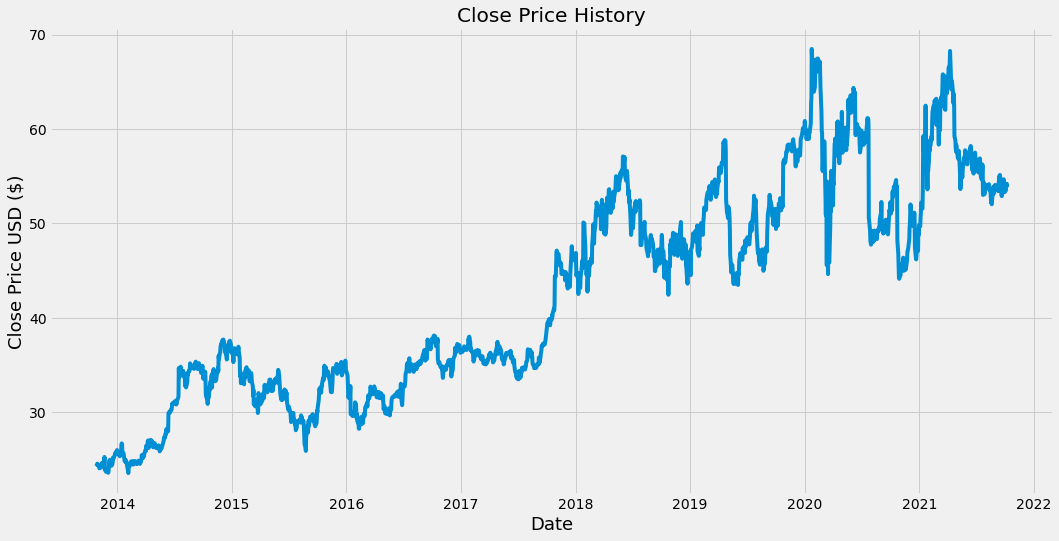

In [90]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(intc_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

- The trends look intersting. It looks like the INTC closing price has increased from previous years.

In [91]:
# Create a new dataframe with only the 'Close' column
data = intc_data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
# Here i am using 80% data for training
# math.ceil is used for round it up
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1603

In [92]:
"""
MinMaxScaler. 
For each value in a feature, 
MinMaxScaler subtracts the minimum
value in the feature and then divides 
by the range. The range is the difference
between the original maximum and original minimum. 
MinMaxScaler preserves the shape of the 
original distribution.
range = [0,1]
"""


# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data variable store our scaler data values
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01601778],
       [0.01868743],
       [0.02224694],
       ...,
       [0.67764179],
       [0.6820912 ],
       [0.67385985]])

- Our data are scaled now it looks great so far.

In [93]:
# Create the training dataset
# Create the scaled trainig dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train datasets
x_train = []    # Independent feature
y_train = []    # Dependent feature

for i in range(60, len(train_data)):
    # We append the past 60 values to our x_train data
    x_train.append(train_data[i-60:i,0])
    # y_train will contain the 60first values
    y_train.append(train_data[i, 0])
#     if i<= 60:
#         print(f"X_train contain past 60 values: \n\n{x_train}\n\n")
#         print(f"Y_train contain the 60first values:  \n{y_train}")
#         print()
    if i<= 61:
        print(f"X_train contain past 60 values: \n\n{x_train}\n\n")
        print(f"Y_train contain the 60first values:  \n{y_train}")
        print()



X_train contain past 60 values: 

[array([0.01601778, 0.01868743, 0.02224694, 0.02180199, 0.02113457,
       0.01802001, 0.01646273, 0.01134594, 0.01624026, 0.01201333,
       0.01268075, 0.0144605 , 0.02024471, 0.02402669, 0.01935481,
       0.02224694, 0.02402669, 0.0262514 , 0.0231368 , 0.03804225,
       0.00778644, 0.00511679, 0.00289208, 0.00845382, 0.00711901,
       0.00400446, 0.00066738, 0.00489431, 0.01646273, 0.02892101,
       0.03136818, 0.02892101, 0.02002224, 0.02113457, 0.01713015,
       0.02068966, 0.0253615 , 0.03626249, 0.03604002, 0.03426027,
       0.04004448, 0.04249165, 0.04849834, 0.04627363, 0.05183537,
       0.0542825 , 0.05050057, 0.05027809, 0.04315903, 0.04605116,
       0.04249165, 0.039822  , 0.04471636, 0.04404893, 0.06651835,
       0.07007785, 0.06718577, 0.05183537, 0.04605116, 0.039822  ])]


Y_train contain the 60first values:  
[0.03581754562127504]

X_train contain past 60 values: 

[array([0.01601778, 0.01868743, 0.02224694, 0.02180199, 0.0211

If you can noticed we print our values <=61 if will print two arrays of x_train and two arrays of y_train

This is our x_train:
array([0.01601778, 0.01868743,...]), 
array([0.01868743, 0.02224694, 0.02180199, 0.02113457, 0.01802001,...])
you can see the first array value starts with 0.01601778 and the second array is start with the second value from the first array and the last value of the last array which is 0.0358175 is the first value of our y_train.


- Know we have our X training dataset and y tarining dataset



In [94]:
# Convert the x_train and y_train to numpy arrays
# so we can use in LSTM model.
x_train, y_train = np.array(x_train), np.array(y_train)

In [95]:
# Reshape the data
# A lSTM network expects the input to be 3- Dimensional in the form
# a number of samples, = no. of rows -> 1543-> x_train.shape[0]
# no. of time steps, -> 60-> x_train.shape[1]
# no. of features. -> 1(closing price)
# right know our x_train is 2-Dimensional
# try x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [96]:
# Build the LSTM Model
model = Sequential()
# Input shape( no.of time steps, no of features)
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [97]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss ='mean_squared_error'
)

In [110]:
# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/2
1543/1543 [==============================] - 9s 6ms/step - loss: 9.8997e-04
Epoch 2/2
1543/1543 [==============================] - 9s 6ms/step - loss: 7.3124e-04


In [111]:
# CREATE THE TESTING DATA SET
# CREATE A NEW ARRAY CONTAINING SCALED VALUES FROM INDEX 1543 TO 2003
test_data = scaled_data[training_data_len - 60:, :]
# CREATE THE DATA SETS X_TEST AND Y_TEST
x_test = []
# y_test contain actucal value that model is going to predict
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    # x_test contain past 60 values
    x_test.append(test_data[i-60:i, 0])
    
    

In [112]:
# CONVERT THE DATA TO A NUMPY ARRAY
x_test = np.array(x_test)


In [113]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [114]:
# Get the models predicted price values
predictions = model.predict(x_test)
# Here are unscaling the data to see the actual values that y_test contains
predictions = scaler.inverse_transform(predictions)

In [115]:
# Evaluating our model
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1.4795680613536957

* WOW... we got good RMSE score.

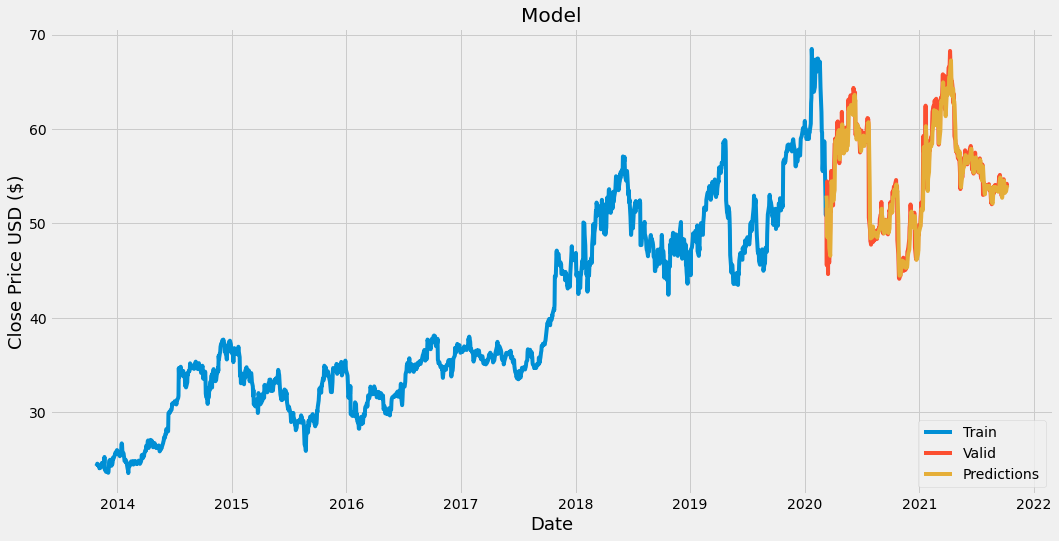

In [116]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()


Predictions looks great..
It looks almost similer
Data science|ML is amazing isn't it.


* Blue colour shows on which data was train.
* Orange colour shows the actual values for rest of the days
* Yello colour is the predictions 

In [117]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-03-11,51.660000,52.927891
2020-03-12,45.540001,52.297974
2020-03-13,54.430000,48.541775
2020-03-16,44.610001,51.381702
2020-03-17,50.080002,48.429237
...,...,...
2021-10-04,53.470001,53.427761
2021-10-05,53.950001,53.424648
2021-10-06,53.980000,53.688290


In [118]:
# Get the quote
intc_quote = web.get_data_yahoo('INTC',
                              start=datetime.datetime(2013, 10, 25),
                              end=datetime.datetime(2021,10,8))
# Create a new dataframe
new_df = intc_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[53.867836]]


***Our model predicted for next day which is 2021,10,9 with 53.86***

In [119]:
# Get the quote
intc_quote2 = web.get_data_yahoo('INTC',
                              start=datetime.datetime(2021,10,9),
                              end=datetime.datetime(2021,10,9))
# printing actual value
print(intc_quote2['Close'])

Date
2021-10-08    53.810001
Name: Close, dtype: float64


 WOW amazing it almost predicted correctly.

# **I hope you like this amazing journey. If you liked give me upvote it motivates me.**# 

More to come soon...